In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from string import punctuation
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/ss.csv')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [5]:
data['email'].fillna('', inplace=True)

data['email'] = data['email'].apply(lambda x: x.lower())

In [6]:
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    return ' '.join(tokens)

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
data['email'] = data['email'].apply(preprocess)

In [9]:
X = data['email']
y = data['label']

In [10]:
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=42)

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
predict = knn.predict(X_test)
accuracy = accuracy_score(y_test, predict)
c_matrix = confusion_matrix(y_test, predict)
print(f'K-Nearest Neighbors Accuracy: {(accuracy) * 100:.2f}%')
print('K-Nearest Neighbors Confusion Matrix:')
print(c_matrix)

K-Nearest Neighbors Accuracy: 88.53%
K-Nearest Neighbors Confusion Matrix:
[[572  52]
 [ 34  92]]


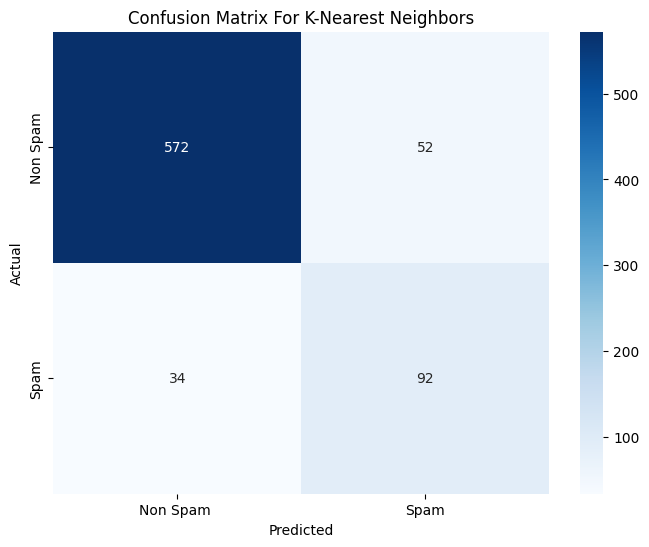

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non Spam ', 'Spam'], yticklabels=['Non Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For K-Nearest Neighbors')
plt.show()

In [16]:
result_df = pd.DataFrame({'Original Labels': y_test, 'Predicted Label': predict})
print(result_df.head(20))

      Original Labels  Predicted Label
1801                0                0
1190                0                0
1817                0                0
251                 0                0
2505                1                1
1117                0                0
1411                0                0
2113                0                0
408                 0                0
2579                1                1
2254                0                0
52                  0                0
644                 0                0
1763                0                0
2776                1                1
900                 0                0
1073                0                0
472                 0                0
2738                1                1
2546                1                1
